<a href="https://colab.research.google.com/github/beifa/last_chance/blob/0.0.2/practice_linreg_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_russian/topic04_linear_models/lesson6_practice_linreg_optimization.ipynb

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/data/weights_heights.csv', index_col='Index')

In [0]:
#install seborn 0.9.0
!pip install seaborn --upgrade

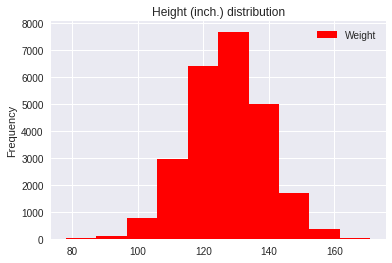

In [0]:
df.plot(y='Weight', kind = 'hist', color = 'r', title='Height (inch.) distribution')

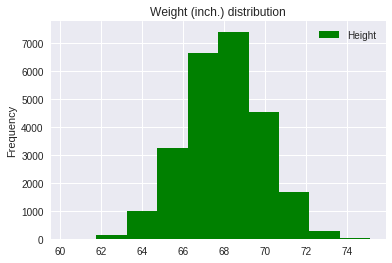

In [0]:
df.plot(y='Height',kind = 'hist', color = 'g', title = 'Weight (inch.) distribution')

Аргументы:

      y='Height' - тот признак, распределение которого мы строим
      kind='hist' - означает, что строится гистограмма
      color='red' - цвет

#### Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков.

Создается $m \times m$ графиков (m - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. 

Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или pairplot библиотеки Seaborn.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


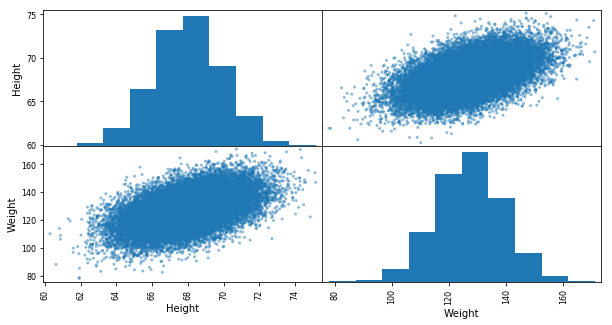

In [0]:
pd.scatter_matrix(df, alpha = .5, figsize =(10, 5));

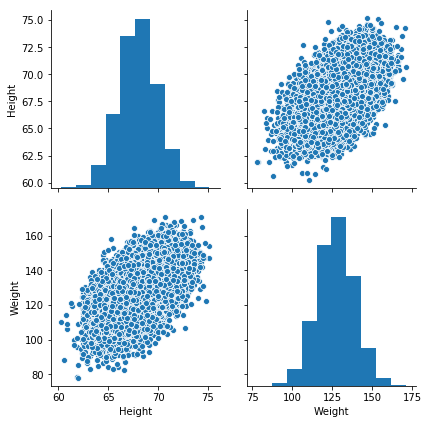

In [0]:
sns.pairplot(df, height= 3)

### Body mass index


Индекс массы тела (ИМТ) или индекс Кетле - это значение, полученное из массы (веса) и роста человека.

ИМТ определяется как масса тела, деленная на квадрат роста, и выражается повсеместно в единицах кг / м2 в результате массы в килограммах и роста в метрах.

In [0]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [0]:
df['BMI'] = df.apply(lambda row: make_bmi(row['Height'],
                                          row['Weight']), axis=1)

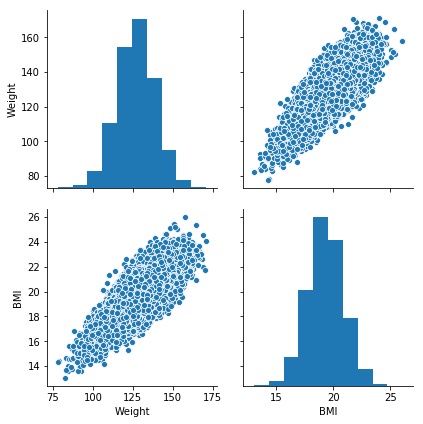

In [0]:
sns.pairplot(df[['Weight', 'BMI']],height= 3)

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других.


### Создайте в DataFrame data новый признак weight_category, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод boxplot библиотеки Seaborn и метод apply Pandas DataFrame. Подпишите ось y меткой «Рост», ось x – меткой «Весовая категория».

In [0]:
def weight_category(weight):
  """
  мы должны сделать три категории
  """
  if weight >= 150:
    return 3
  elif weight < 120:
    return 1
  else:
    return 2
  
    

In [0]:
df['weight_cat'] = df['Weight'].apply(weight_category)

In [0]:
df.head()

,Height,Weight,BMI,weight_cat
Index,,,,
1,65.78331,112.9925,18.357573,1
2,71.51521,136.4873,18.762577,2
3,69.39874,153.0269,22.338895,3
4,68.21660,142.3354,21.504526,2
5,67.78781,144.2971,22.077581,2


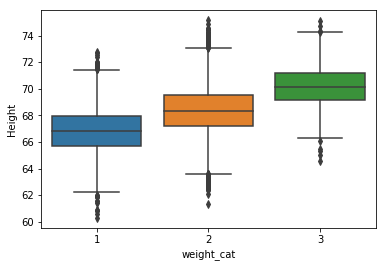

In [0]:
sns.boxplot(x = 'weight_cat', y = 'Height', data = df)

Постройте scatter plot зависимости роста от веса, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.

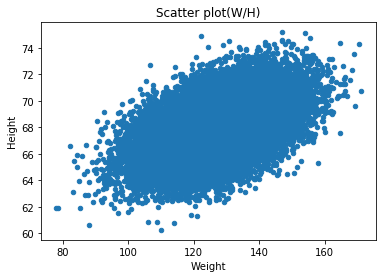

In [0]:
df.plot(x = 'Weight', y = 'Height', kind = 'scatter', title= 'Scatter plot(W/H)')

### Часть 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки.


#### [6]. Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$: $$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$ Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных.


In [0]:
def square_error(w0, w1, df):
  """
  Same example how make:
  это мое решение через(zip, and values), но у чувака было другое и оно работало
  ну я его переделал и заменил iterrows на itertuples банально но .....
  и вот вроде все работает.
  
  Но на вызове minimize_scalar вываливается ошибка,
  ну я  дурак не надо менять местами аргументы в square_error(w0, w1, df)
  
  Через iterrows или itertuples работает даже на глаз дольше,
  мое практически сразу ответ.
  
  Итог оставил свое.  
  
  1-----------------
  error = 0
  for x in df.itertuples():
    print(x.Height, x.Weight)
    #df.itertuples() -- >  return type pandas
    error += (x.Height -(w0 + w1 * x.Weight))**2    
  return error 
  
  2-----------------
  
  def quare_error(w1, w0, df):
    summa = 0.0
    for _, row in df.iterrows():
        summa+=(row['Height'] - (w0 + w1 * row['Weight'])) ** 2
    return summa
  
  -----------------
  
  w0, w1 = 60,.05
  square_error(df, w0, w1)
  >>> 138197.37942816826 
  
  """
  error = 0
  for y, x in zip(df.Height.values, df.Weight.values):
    error += (y -(w0 + w1 * x))**2    
  return error


####[7]. Проведите на графике две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. 

Используйте метод plot из matplotlib.pyplot, а также метод linspace библиотеки NumPy. Подпишите оси и график.

In [0]:
yy = []
w0, w1 = 60,.05
for x in df.Weight.values:
  y = w0 + w1 * x
  yy.append(y)

In [0]:
yy2 = []
w0, w1 = 50,.16
for x in df.Weight.values:
  y = w0 + w1 * x
  yy2.append(y)

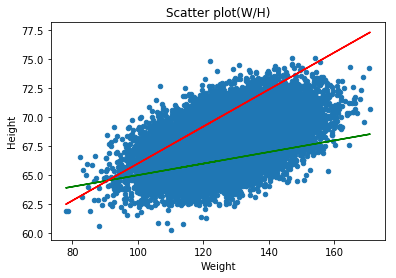

In [0]:
df.plot(x = 'Weight', y = 'Height', kind = 'scatter', title= 'Scatter plot(W/H)')
for w0, w1 in zip([60, 50], [.05, .16]):
  y_line = []
  for x in df.Weight.values:
    y = w0 + w1 * x
    y_line.append(y)
    
  plt.plot(df.Weight.values, y_line, color = np.random.choice(['r', 'g'], 1)[0])

In [0]:
# Another way
# импортируем для перебора параметров по кругу для ax0
from cycler import cycler

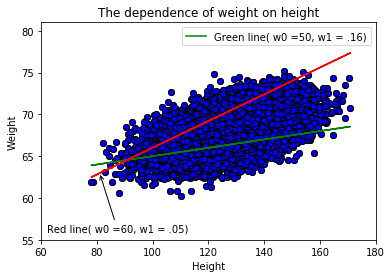

In [0]:
fig, ax0 = plt.subplots(nrows=1)
ax0.set_prop_cycle(cycler('color', ['g', 'r', 'y']))
for w0, w1 in zip([60, 50], [.05, .16]):
  y_line = []
  for x in df.Weight.values:
    y = w0 + w1 * x
    y_line.append(y)
    
  ax0.plot(df.Weight.values, y_line)
  ax0.scatter(x = df['Weight'].values, y = df['Height'].values,
             color = 'b', edgecolor = 'k')
  
ax0.set_ylabel('Weight')
ax0.set_xlabel('Height')
ax0.set_title('The dependence of weight on height')
ax0.annotate('Red line( w0 =60, w1 = .05)',
             xy=(81, 63),
             xytext=(62, 56),
             arrowprops=dict(arrowstyle="->", facecolor='black'),
            )

ax0.set_ylim(55, 81)
ax0.set_xlim(60, 180);
ax0.legend(['Green line( w0 =50, w1 = .16)'])

#### [8]. Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра  w1  при  w0  = 50. Подпишите оси и график.

*поглядел как сделано у других и вот там используются параметры из условия задания №9*

### Есть константа это  w0 =50, а вот w1 мы перебираем [-5, 5]  .25 шаг

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.


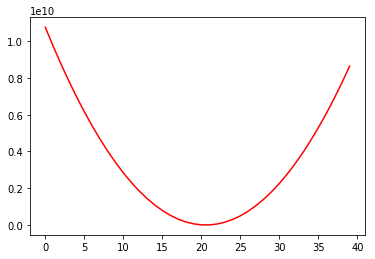

In [0]:
# plot cruve error
w0 = 50
box = []
for w1 in np.arange(-5, 5, .25):
  se = square_error(w0, w1, df)
  box.append(se)
plt.plot(box, color = 'r')

In [0]:
#find min x

w1 = 50
minimize_scalar(square_error, bounds=(-5, 5), args=(w1, df)) # x: 0.14109203728834385, x: 0.11755648377145886

In [0]:
#add params 
yy3 = []
w0, w1 = 53.01606683968942,0.11755648377145886
for x in df.Weight.values:
  y = w0 + w1 * x
  yy3.append(y)

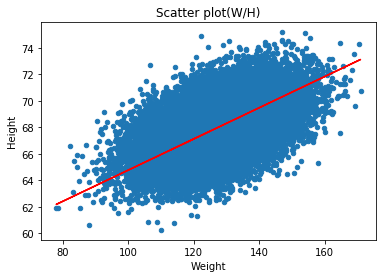

In [0]:
df.plot(x = 'Weight', y = 'Height', kind = 'scatter', title= 'Scatter plot(W/H)')
plt.plot(df.Weight.values, yy3, color = 'r')

####[9]. Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции  z(x,y)=sin(x2+y2−−−−−−√)  для значений  x  и  y  из интервала [-5,5] c шагом 0.25.

При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме.

In [0]:
from mpl_toolkits.mplot3d import Axes3D

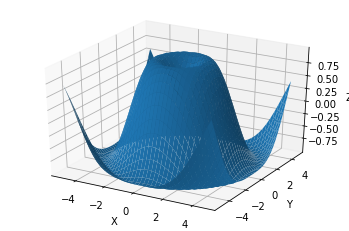

In [0]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

#### [10]. Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

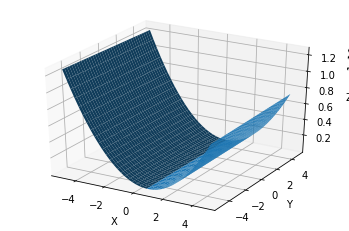

In [0]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = square_error(X,Y, df)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


#### [11]. С помощью метода minimize из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5].

Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

In [0]:
from scipy.optimize import minimize

In [0]:
#Signature: minimize(fun, x0, args=(), method=None, jac=None, hess=None, 
#                   hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)

In [0]:
bnds = ([-100,100],[-5,5])

"""
вот как до этого дапереть самому то:

мы не используем ф square_error в minimize хз по чему но так и не заработало
проблема в передаче параметров как я понимаю
что мы делаем:
создаем ф тест и в ней выполняем square_error и вот х это [0,0],
зачем тогда args????

>>> x: array([57.57175421,  0.08200666])
"""

def test(x):
  return square_error(x[1], x[0], df)

minimize(test,[0,0], bounds=bnds, method= 'L-BFGS-B')

In [0]:
yy5 = []
w0, w1 = [57.57175421,  0.08200666]
for x in df.Weight.values:
  y = w0 + w1 * x
  yy5.append(y)

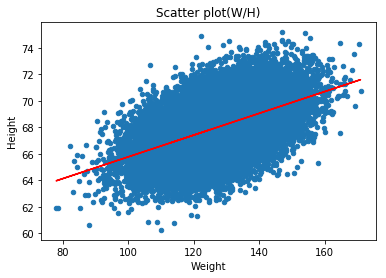

In [0]:
df.plot(x = 'Weight', y = 'Height', kind = 'scatter', title= 'Scatter plot(W/H)')
plt.plot(df.Weight.values, yy5, color = 'r')

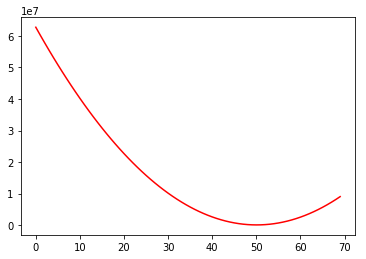

In [0]:
# test w0?
w1 = 0.14109203728834385
box = []

for w0 in np.arange(0, 70, 1):
  se = square_error(df, w0, w1)
  box.append(se)
plt.plot(box, color = 'r')

In [0]:
w1 = 0.14109203728834385
minimize_scalar(square_error, bounds=(50, 60), args=(w1, df)) 

     fun: 756010.1839337789
    nfev: 9
     nit: 5
 success: True
       x: 0.5301606683968942

In [0]:
yy4 = []
w0, w1 = 53.01606683968942, 0.14109203728834385
for x in df.Weight.values:
  y = w0 + w1 * x
  yy4.append(y)

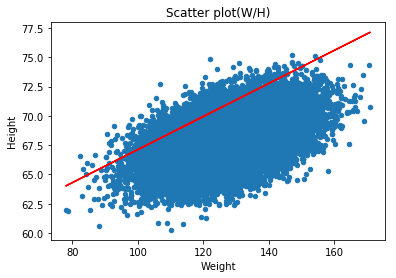

In [0]:
df.plot(x = 'Weight', y = 'Height', kind = 'scatter', title= 'Scatter plot(W/H)')
plt.plot(df.Weight.values, yy4, color = 'r')

#### Test  constanta w1


Мы уже вычислили w1 попробуем сделать это для w0

Начальные значения:

        w0, w1 = 50,   0.11755648377145886



      (w1, w0, df)
w1 =50 or w0 = 50      
print(w0, w1)

      50 0.0
      
      50 1.0
      
      50 -1.618034
      
      50 0.0
      
      50 -0.618033974844


      (w0, w1, df)
w1 =50 or w0 = 50  
print(w0, w1)

      0.0 50
      
      1.0 50
      
      -1.618034 50
      
      
как мы видим наша константа это второй аргумент в функции!!!!!!!!!!

Отсюда:

для того чтоб найти w1 нам нужно поменять аргументы в функции w1, w0, df и на оборот для w0 меняем на w0,w1,df в самой функции

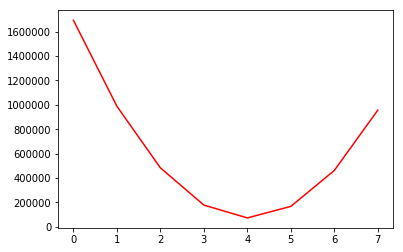

In [0]:
# plot cruve error
w1 = 0.11755648377145886
box = []
for w0 in np.arange(45, 60, 2):
  se = square_error(w0, w1,df)
  box.append(se)
plt.plot(box, color = 'r')

In [0]:
def square_error(w1, w0, df):
  error = 0
  for y, x in zip(df.Height.values, df.Weight.values):
    error += (y -(w0 + w1 * x))**2    
  return error

In [21]:
w1 = 0.11755648377145886
minimize_scalar(square_error, bounds=(45, 60), args=(w1, df)) # x: 0.14109203728834385, x: 0.11755648377145886

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


     fun: 71841.17446987843
    nfev: 10
     nit: 4
 success: True
       x: 53.05410368647859

In [24]:
w0 = 53.05410368647859
minimize_scalar(square_error, bounds=(-5, 5), args=(w0, df)) 

     fun: 71805.30642487804
    nfev: 9
     nit: 5
 success: True
       x: 0.11725966732447567